In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
loan = pd.read_csv("E:\Projects\Machine Learning Projects\Raw Data\Classification\loan_data.csv")
loan.head(), loan.isnull().sum()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10424\3189831832.py:1: SyntaxWarning: invalid escape sequence '\P'
  loan = pd.read_csv("E:\Projects\Machine Learning Projects\Raw Data\Classification\loan_data.csv")


(   person_age person_gender person_education  person_income  person_emp_exp  \
 0        22.0        female           Master        71948.0               0   
 1        21.0        female      High School        12282.0               0   
 2        25.0        female      High School        12438.0               3   
 3        23.0        female         Bachelor        79753.0               0   
 4        24.0          male           Master        66135.0               1   
 
   person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
 0                  RENT    35000.0    PERSONAL          16.02   
 1                   OWN     1000.0   EDUCATION          11.14   
 2              MORTGAGE     5500.0     MEDICAL          12.87   
 3                  RENT    35000.0     MEDICAL          15.23   
 4                  RENT    35000.0     MEDICAL          14.27   
 
    loan_percent_income  cb_person_cred_hist_length  credit_score  \
 0                 0.49                         3.0

LEGEND FOR LOAN STATUS

---

1 --> Approved
0 --> Not Approved

DATA PREPROCESSING

---

In [3]:
loan_cop = loan.copy()

In [4]:
enc = LabelEncoder()
obj = loan_cop.select_dtypes(include='object').columns
for i in obj:
    loan_cop[i] = enc.fit_transform(loan_cop[i])
loan_cop.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


DATA ANALYSIS

---

In [7]:
sns.set()

In [8]:
def plot(data, x=None, y=None, hue=None, style='hist'):
    plt.figure(figsize=(10, 5))
    if style=='hist':
        sns.histplot(data[x], kde=True, kde_kws=dict(cut=3))
    elif style=='box':
        sns.boxplot(x=x, y=y, hue=hue, data=data)
    elif style=='scatter':
        sns.scatterplot(x=x, y=y, hue=hue, data=data)
    elif style=='count':
        sns.countplot(y=y, hue=hue, data=data)
    else:
        raise ValueError(f"plot style unacceptable: {style}")
    plt.show()

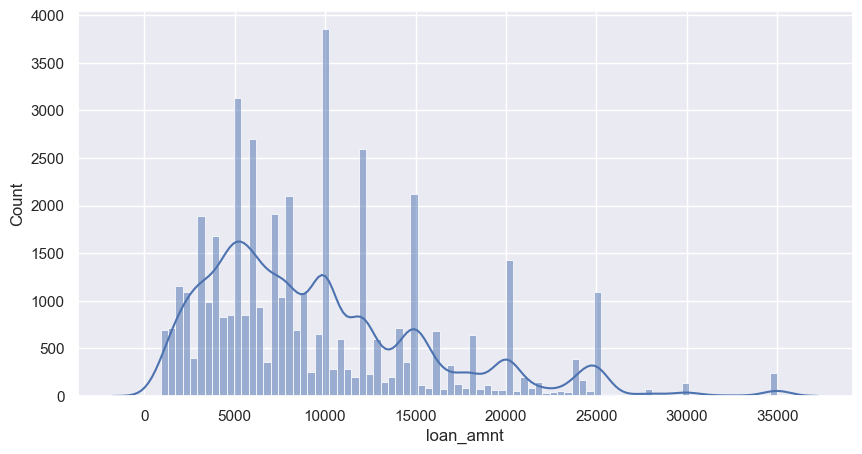

In [9]:
plot(loan, x='loan_amnt', style='hist')

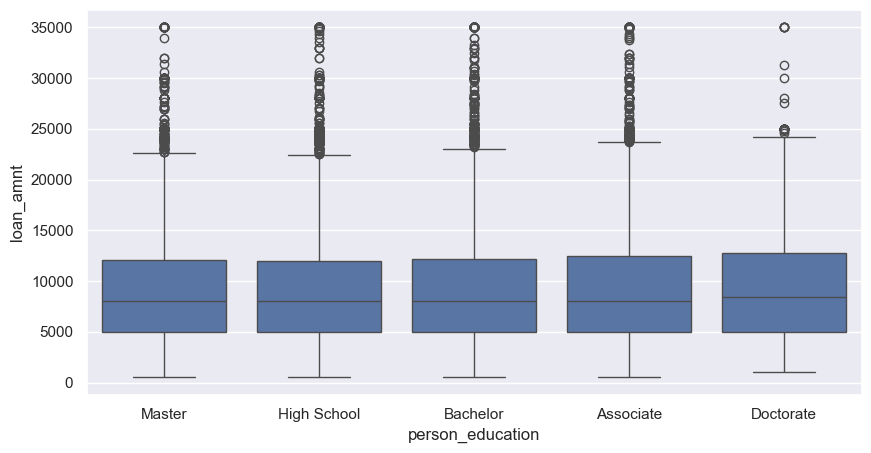

In [10]:
plot(loan, x='person_education', y='loan_amnt', style='box')

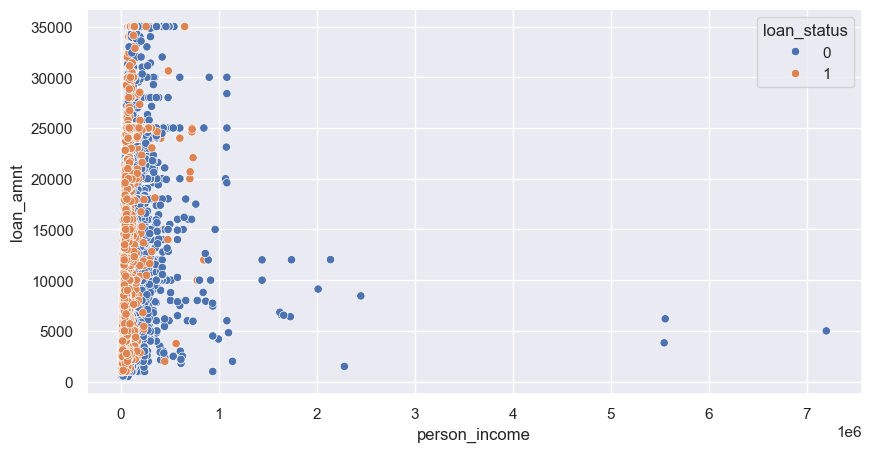

In [11]:
plot(loan, x='person_income', y='loan_amnt', hue='loan_status', style='scatter')

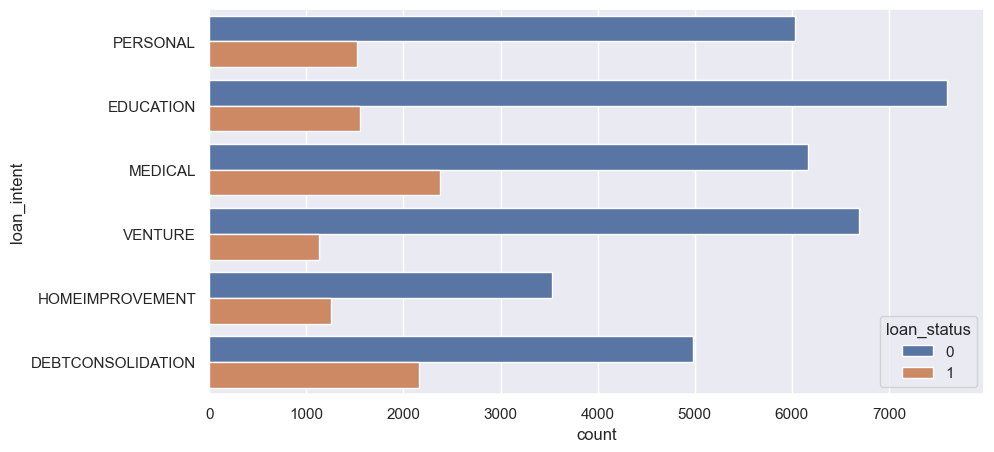

In [12]:
plot(loan, y='loan_intent', style='count', hue='loan_status')

In [6]:
# Step: Check for Multicollinearity
# Set a threshold for high correlation (e.g., 0.8)
threshold = 0.8

# Find pairs of highly correlated features
high_corr = corr[(corr >= threshold) & (corr < 1.0)]

# Display the features with high correlation
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)

print("Highly Correlated Feature Pairs (Threshold > 0.8):")
print(high_corr_pairs)

Highly Correlated Feature Pairs (Threshold > 0.8):
                    Feature 1                   Feature 2  Correlation
0                  person_age              person_emp_exp     0.954412
2              person_emp_exp                  person_age     0.954412
1                  person_age  cb_person_cred_hist_length     0.861985
4  cb_person_cred_hist_length                  person_age     0.861985
3              person_emp_exp  cb_person_cred_hist_length     0.824272
5  cb_person_cred_hist_length              person_emp_exp     0.824272


In [7]:
corr = loan_cop.corr()
print(corr['loan_status'].sort_values(ascending=False).round(3)*100)

loan_status                       100.0
loan_percent_income                38.5
loan_int_rate                      33.2
person_home_ownership              23.4
loan_amnt                          10.8
person_gender                      -0.1
person_education                   -0.2
credit_score                       -0.8
cb_person_cred_hist_length         -1.5
person_emp_exp                     -2.0
person_age                         -2.1
loan_intent                        -7.2
person_income                     -13.6
previous_loan_defaults_on_file    -54.3
Name: loan_status, dtype: float64


ML MODEL BUILDING

---

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [16]:
X = loan_cop.iloc[:,:-1]
y = loan_cop.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
acc_score = metrics.accuracy_score(y_test, clf.predict(X_test))
print(f"Accuracy Score for test is {acc_score}")

Accuracy Score for test is 0.9286666666666666
